In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../trustpilot_carhartt-wip_com_fr.csv")
df.head()



,Titre de l'avis,Avis,Date_str,Date
0,Très grande qualité de coton,"Très grande qualité de coton, coupe impeccable...",6 nov. 2025,2025-11-06
1,Un service clientèle génial !,Un service clientèle génial ! Je m’étais total...,29 oct. 2025,2025-10-29
2,Un échange satisfaisant avec Nadia,Un échange satisfaisant avec Nadia. Merci.,23 oct. 2025,2025-10-23
3,Efficacité,La personne que j’ai contacté m’a répondu rapi...,21 oct. 2025,2025-10-21
4,Demande de facture,Merci beaucoup pour notre réactivité et votre ...,17 oct. 2025,2025-10-17


In [8]:
# Longueur des avis
df["len_avis"] = df["Avis"].str.len()

In [9]:
# Statistiques simples
print(df["len_avis"].describe())

count     33.000000
mean     145.636364
std      138.961510
min       34.000000
25%       59.000000
50%       97.000000
75%      175.000000
max      690.000000
Name: len_avis, dtype: float64


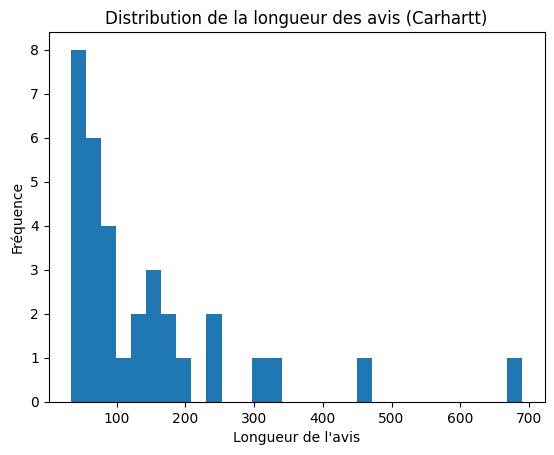

In [10]:
# Histogramme des longueurs
plt.hist(df["len_avis"], bins=30)
plt.xlabel("Longueur de l'avis")
plt.ylabel("Fréquence")
plt.title("Distribution de la longueur des avis (Carhartt)")
plt.show()

In [11]:
# Nombre d'avis par date (si tu as plusieurs pages)
df["Date"] = pd.to_datetime(df["Date"])
counts_by_date = df.groupby("Date").size()

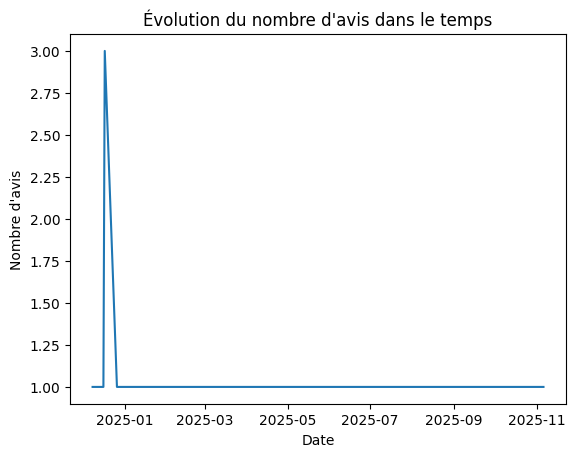

In [12]:
plt.plot(counts_by_date.index, counts_by_date.values)
plt.xlabel("Date")
plt.ylabel("Nombre d'avis")
plt.title("Évolution du nombre d'avis dans le temps")
plt.show()

In [14]:
import sys
import os

# Ajouter la racine du projet au PYTHONPATH
project_root = os.path.abspath("..")  # remonte d’un dossier depuis /notebooks
sys.path.append(project_root)

print("Project root added:", project_root)



Project root added: c:\Users\radjema\Desktop\PROJET_API


In [15]:
import pandas as pd
from src.utils.cleaning import clean_text, detect_language

# 1) Charger le fichier Trustpilot Carhartt
df_car = pd.read_csv("../data/trustpilot_carhartt-wip_com_fr.csv")

# 2) S'assurer que la colonne Avis est bien du texte
df_car["Avis"] = df_car["Avis"].astype(str).fillna("")

# 3) Nettoyage du texte
df_car["Avis_clean"] = df_car["Avis"].apply(clean_text)

# 4) Détection de la langue
df_car["Langue"] = df_car["Avis_clean"].apply(detect_language)

# 5) Infos projet (facultatif mais utile)
df_car["platform"] = "Trustpilot"
df_car["brand"] = "Carhartt WIP"

# 6) Optionnel : longueur des avis, pour l’EDA
df_car["len"] = df_car["Avis_clean"].str.len()

# 7) Aperçu
df_car.head()


,Titre de l'avis,Avis,Date_str,Date,Avis_clean,Langue,platform,brand,len
0,Très grande qualité de coton,"Très grande qualité de coton, coupe impeccable...",6 nov. 2025,2025-11-06,"Très grande qualité de coton, coupe impeccable...",fr,Trustpilot,Carhartt WIP,79
1,Un service clientèle génial !,Un service clientèle génial ! Je m’étais total...,29 oct. 2025,2025-10-29,Un service clientèle génial ! Je m’étais total...,fr,Trustpilot,Carhartt WIP,248
2,Un échange satisfaisant avec Nadia,Un échange satisfaisant avec Nadia. Merci.,23 oct. 2025,2025-10-23,Un échange satisfaisant avec Nadia. Merci.,fr,Trustpilot,Carhartt WIP,42
3,Efficacité,La personne que j’ai contacté m’a répondu rapi...,21 oct. 2025,2025-10-21,La personne que j’ai contacté m’a répondu rapi...,fr,Trustpilot,Carhartt WIP,75
4,Demande de facture,Merci beaucoup pour notre réactivité et votre ...,17 oct. 2025,2025-10-17,Merci beaucoup pour notre réactivité et votre ...,fr,Trustpilot,Carhartt WIP,87


In [16]:
df_car.to_csv("../data/reviews_trustpilot_carhartt_clean.csv", index=False)
